In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

In [36]:
#Load the dataset
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Preprocess data
drop irrelevant features

In [37]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1) #Col wise
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
print(data['Gender']) 

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object


In [40]:
## Encode categorical variables
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [41]:
print("Classes in label encoder:", label_encoder_gender.classes_)

Classes in label encoder: ['Female' 'Male']


In [42]:
### One hot encoding for Geography column
from sklearn.preprocessing import OneHotEncoder
ohe_geo = OneHotEncoder(sparse_output=False)

geo_encoded = ohe_geo.fit_transform(data[['Geography']])
geo_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [43]:
ohe_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [44]:
geo_encoded_df = pd.DataFrame(geo_encoded, columns=ohe_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [45]:
## Combine columns ohe to original data
data = pd.concat([data.drop('Geography', axis=1), geo_encoded_df], axis=1)
data


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [46]:
### Saving encoders and scaler
with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(label_encoder_gender, file)

with open('ohe_geo.pkl', 'wb') as file:
    pickle.dump(ohe_geo, file)



In [47]:
## Devide the dataset into dependent(Exited) and independent variables
X= data.drop('Exited', axis=1) # Independent variables
y = data['Exited']  # Dependent variable

#Split the dataset into training and testing sets
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=69)

#Scaling 
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


In [15]:
X_train

array([[ 1.196046  ,  0.9056767 , -0.65829995, ...,  0.99104014,
        -0.57273139, -0.57504086],
       [-0.17374264,  0.9056767 , -1.23120172, ...,  0.99104014,
        -0.57273139, -0.57504086],
       [-0.82750541,  0.9056767 , -0.56281632, ..., -1.00904087,
         1.74601919, -0.57504086],
       ...,
       [-0.96240883,  0.9056767 , -0.75378358, ...,  0.99104014,
        -0.57273139, -0.57504086],
       [-0.5992073 ,  0.9056767 , -0.27636543, ...,  0.99104014,
        -0.57273139, -0.57504086],
       [ 2.06772969,  0.9056767 , -0.8492672 , ...,  0.99104014,
        -0.57273139, -0.57504086]])

In [48]:
with open('scalar.pkl', 'wb') as file:
    pickle.dump(scalar, file)

## ANN Implementation

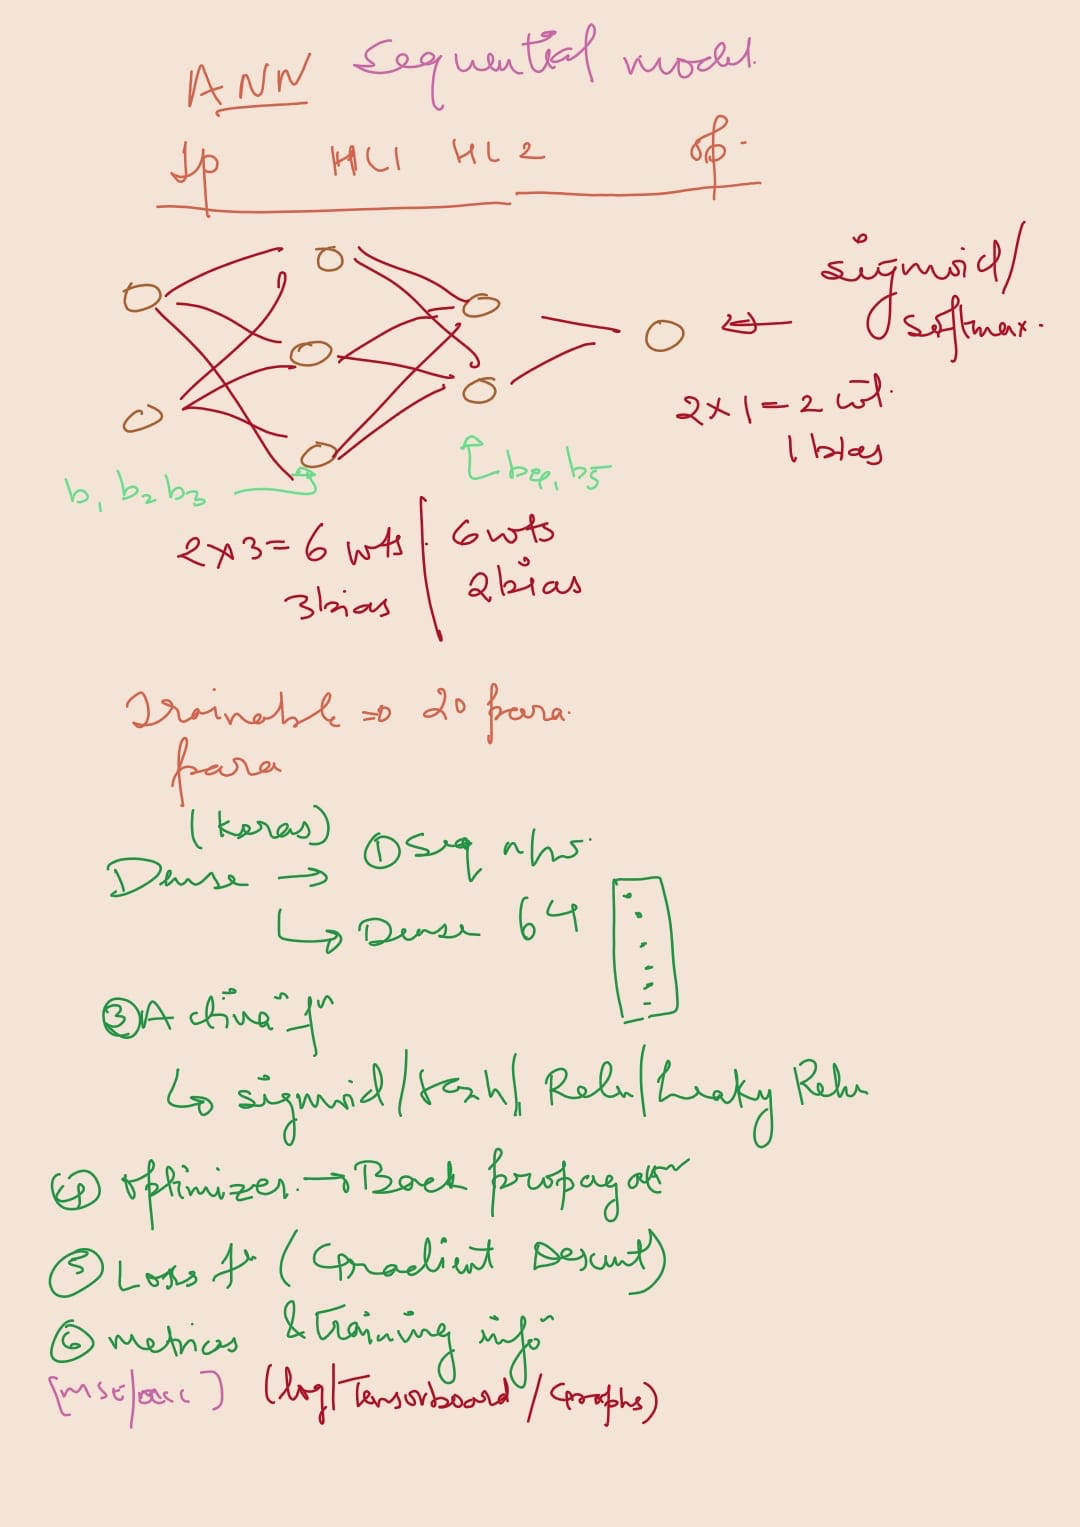

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [18]:
(X_train.shape[1],)

(12,)

In [19]:
## Build ANN Model
model = Sequential(
    [
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)), #1st HL
        Dense(32, activation='tanh'), #2nd HL
        Dense(16, activation='relu'), 
        Dense(1, activation='sigmoid')  # Output layer
    ]
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.BinaryCrossentropy()

In [24]:
## Compile the model
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [26]:
## Set up tensorboard callback
log_dir = "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tf_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [27]:
## Set up early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [28]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test,y_test),
    epochs = 100,
    callbacks = [tf_callback, early_stop]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6990 - loss: 0.5575 - val_accuracy: 0.8350 - val_loss: 0.3931
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8379 - loss: 0.3814 - val_accuracy: 0.8575 - val_loss: 0.3581
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8568 - loss: 0.3515 - val_accuracy: 0.8610 - val_loss: 0.3491
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8612 - loss: 0.3401 - val_accuracy: 0.8580 - val_loss: 0.3507
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.8577 - loss: 0.3438 - val_accuracy: 0.8600 - val_loss: 0.3475
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.8605 - loss: 0.3352 - val_accuracy: 0.8575 - val_loss: 0.3482
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.8595 - loss: 0.3297 - val_accuracy: 0.8570 - val_loss: 0.3497
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.8590 - loss: 0.3

In [29]:
model.save('ann_model.h5')

In [30]:
## Load TensorBoard Extension
%load_ext tensorboard

In [32]:
%tensorboard --logdir logs/fit20250801-151351

Reusing TensorBoard on port 6006 (pid 35851), started 0:00:08 ago. (Use '!kill 35851' to kill it.)

In [33]:
5+15+5+20+10+10 

65

In [ ]:
## Load Pickle files
